11. 서브플롯(1)
- 하나의 그래픽 영역을 나누어 두 개 이상의 시각화 결과물을 하나의 화면에서 표현할 수 있다.

In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

In [2]:
my_dpi = 200
font_path = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR"
my_theme = "dark"

sb.set_theme(style=my_theme)
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [3]:
origin = load_data("traffic_acc")
origin

[data] https://data.hossam.kr/data/lab04/traffic_acc.xlsx
[desc] 2005년 1월 부터 2018년 12월 까지 월별 교통사고의 발생건수,부상자수,사망자수 데이터(인덱스/메타데이터 없음, 출처: 공공데이터포털)
[!] Cannot read metadata


,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


각 변수를 년도별 평균값으로 전처리한다.

In [4]:
df = origin.drop('월', axis=1).groupby("년도").mean()
df

,발생건수,사망자수,부상자수
년도,,,
2005,17847.583333,531.333333,28519.416667
2006,17812.083333,527.250000,28352.416667
2007,17638.500000,513.833333,27992.166667
2008,17985.166667,489.166667,28246.833333
2009,19332.500000,486.500000,30156.250000
2010,18906.500000,458.750000,29371.500000
2011,18475.916667,435.750000,28449.250000
2012,18638.000000,449.333333,28713.750000
2013,17946.166667,424.333333,27392.583333


2. 서브플롯의 기본 사용
[1] 서브플롯 영역 나누기
- 2행 3열을 갖는 서브플롯 영역을 구성한다.
- pyplot.subplots(행, 열[, figsize = (가로크기,세로크기)])
- plt.subplots() 메서드에 의해 리턴되는 fig는 그래픽 처리 기능을 제공하는 객체이다.
- plt.subplots() 메서드에 의해 리턴되는 ax객체는 분할된 각 그래프 영역의 객체를 저장하고 있는 리스트이다.

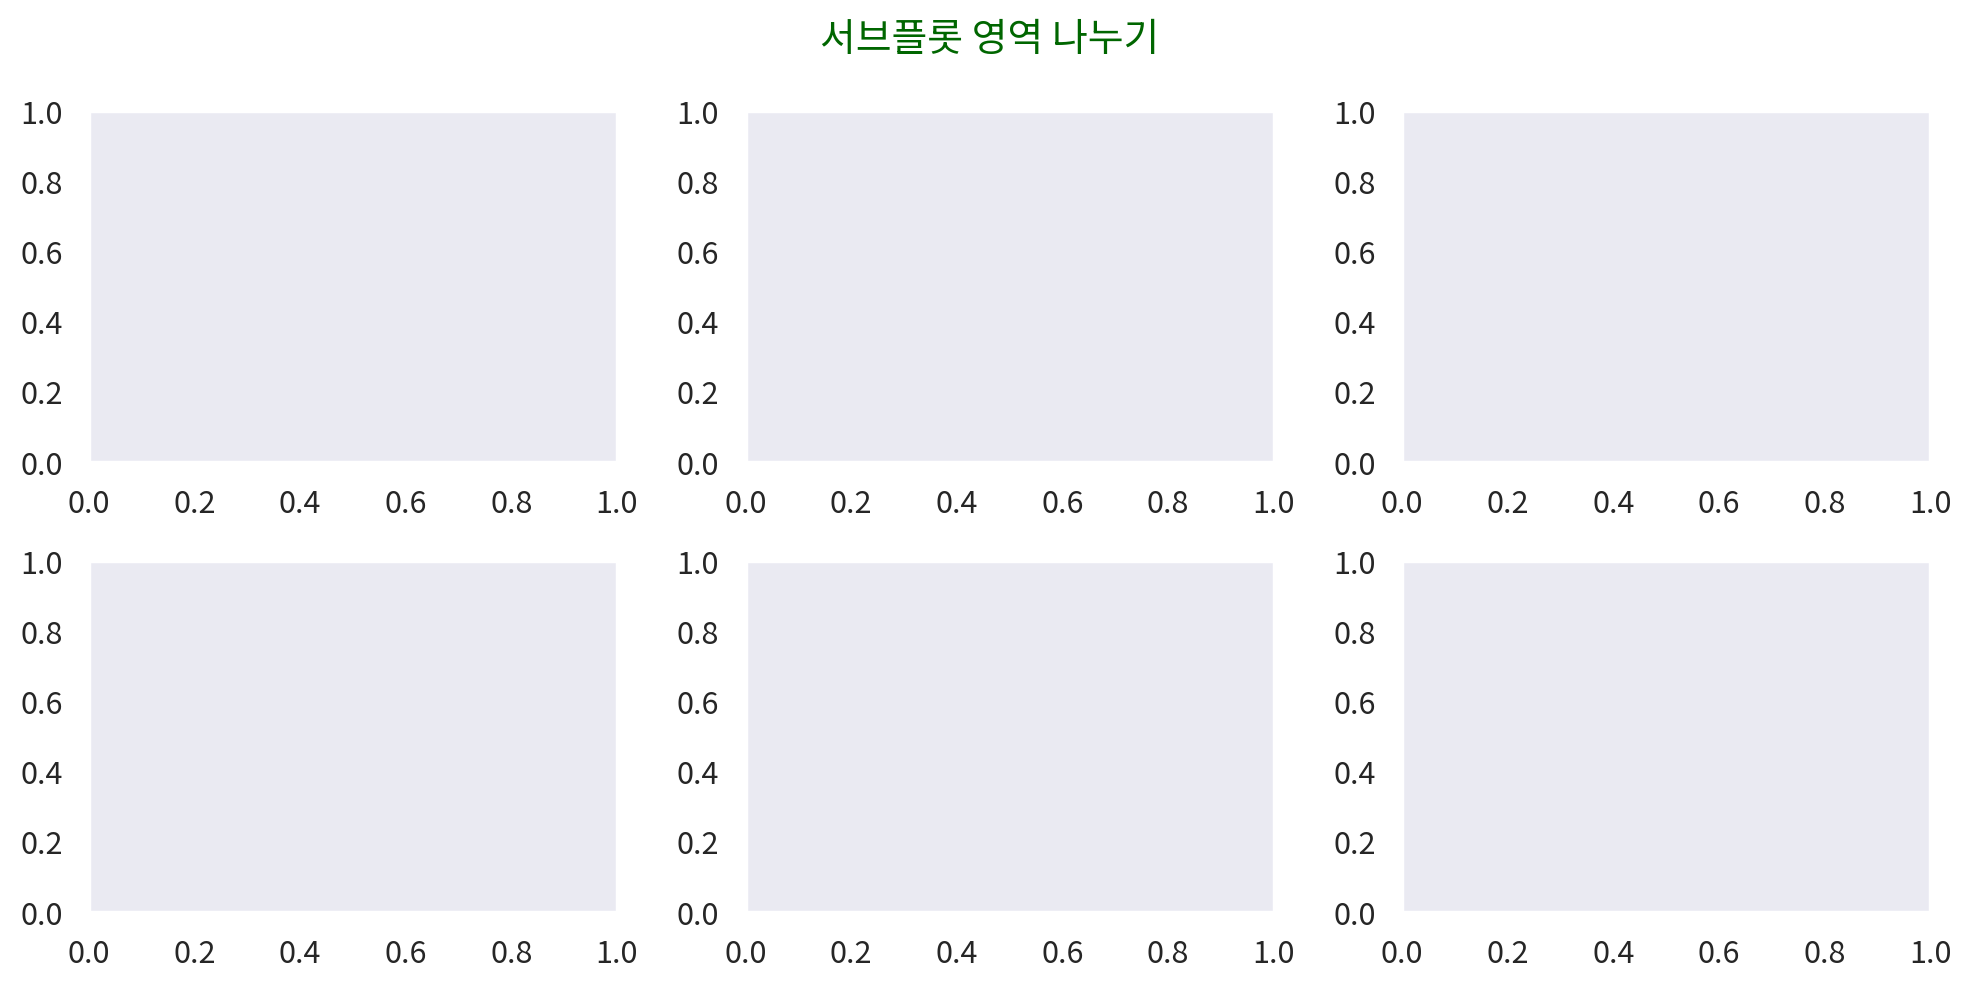

In [7]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000             #그래프 가로 크기
height_px = 1000             #그래프 세로 크기
rows = 2                    #도화지의 행 수
cols = 3                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
#전체 제목
fig.suptitle('서브플롯 영역 나누기', fontsize=14, color='#006600')

#각 그래프 간의 가로 세로 간격 지정
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

서브플롯에 그래프 그리기
- plt.subplots() 메서드의 결과로 ax에 반환되는 객체는 서브플롯의 행,열에 대한 리스트이다.

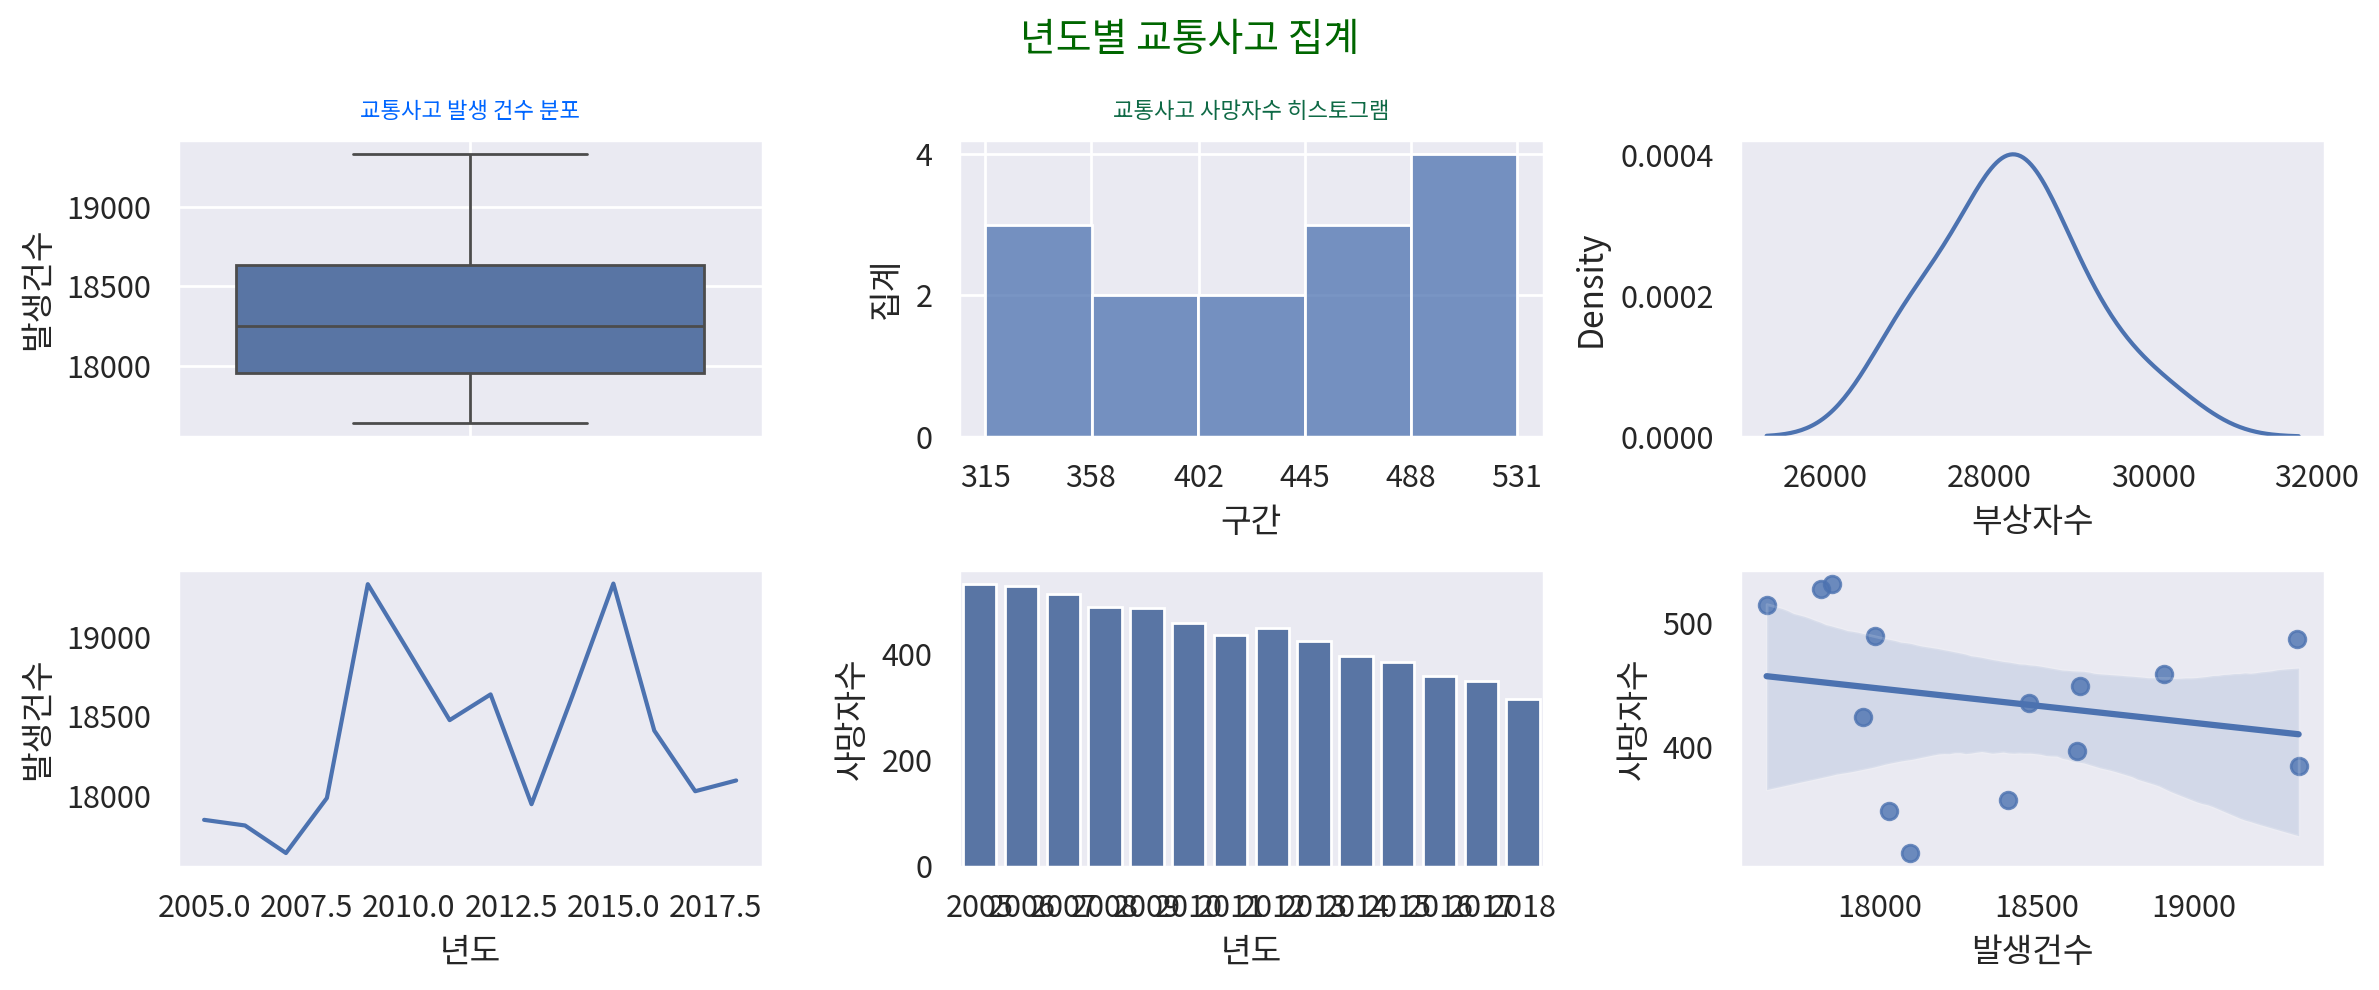

In [9]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2400             #그래프 가로 크기
height_px = 1000             #그래프 세로 크기
rows = 2                    #도화지의 행 수
cols = 3                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=df, y='발생건수', ax=ax[0][0])
sb.histplot(data=df, x='사망자수', bins=5, ax=ax[0][1])
sb.kdeplot(data=df, x='부상자수', ax=ax[0][2])
sb.lineplot(data=df, x=df.index, y='발생건수', ax=ax[1][0])
sb.barplot(data=df, x=df.index, y='사망자수', estimator=np.sum, ax=ax[1][1])
sb.regplot(data=df, x='발생건수', y='사망자수', ax=ax[1][2])

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
#전체 제목
fig.suptitle('년도별 교통사고 집계', fontsize=14, color='#006600')

#각 그래프 간의 가로 세로 간격 지정
fig.subplots_adjust(hspace=0.2, wspace=0.2)

#첫 번째 영역 그래프의 제목, 글자크기, 색상, 격자
ax[0][0].set_title('교통사고 발생 건수 분포', fontsize=8, color='#0066FF', pad=8)
ax[0][0].grid()

# 두 번째 영역 그래프의 x축 설정 및 x,y축 라벨 지정, 격자
hist,bins = np.histogram(df['사망자수'], bins=5)
bins = bins.round().astype("int")
ax[0][1].set_title("교통사고 사망자수 히스토그램", color='#0f6a46',fontsize=8,pad=8)
ax[0][1].set_xticks(bins,bins)
ax[0][1].set_xlabel("구간")
ax[0][1].set_ylabel("집계")
ax[0][1].grid()

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

두 개의 y축을 갖는 그래프
- 샘플 데이터 만들기

In [10]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
y1 = np.arange(10)
y1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
y2 = x**2
y2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

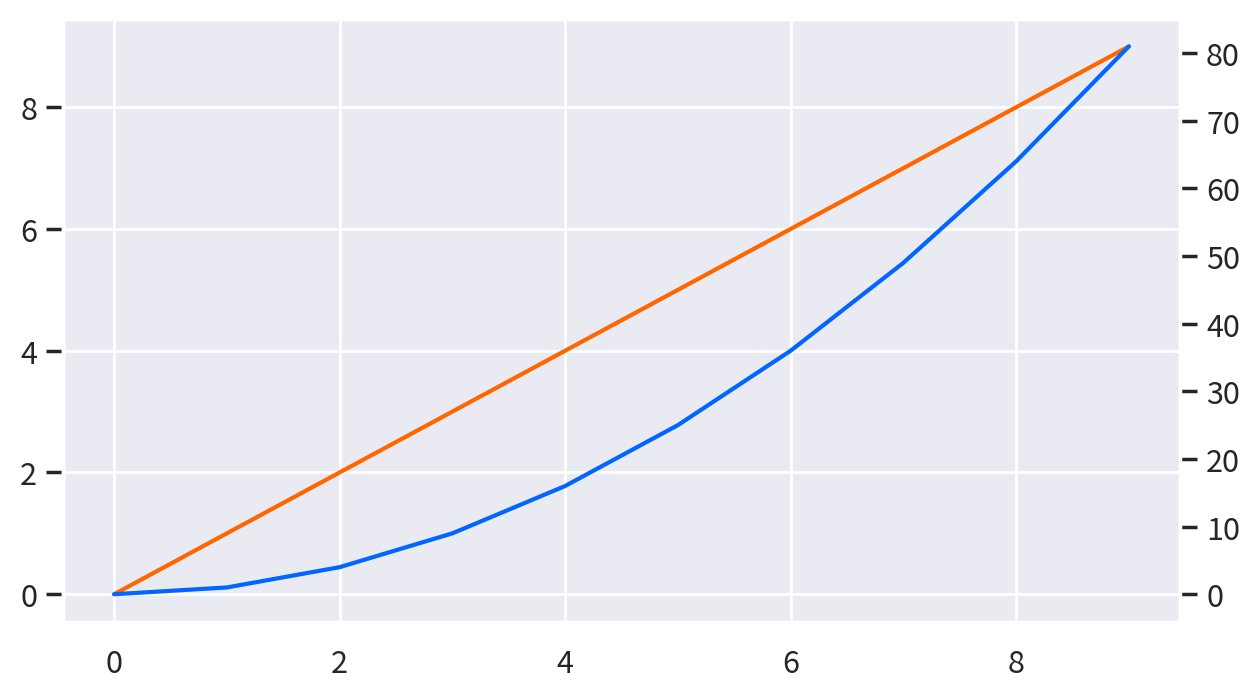

In [13]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

ax2=ax.twinx()

# 2) 그래프 그리기 -> seaborn 사용
# sb.boxplot(data=df1, orient='h')
sb.lineplot(x=x, y=y1, color="#ff6600", ax=ax)
sb.lineplot(x=x, y=y2, color="#0066ff", ax=ax2)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

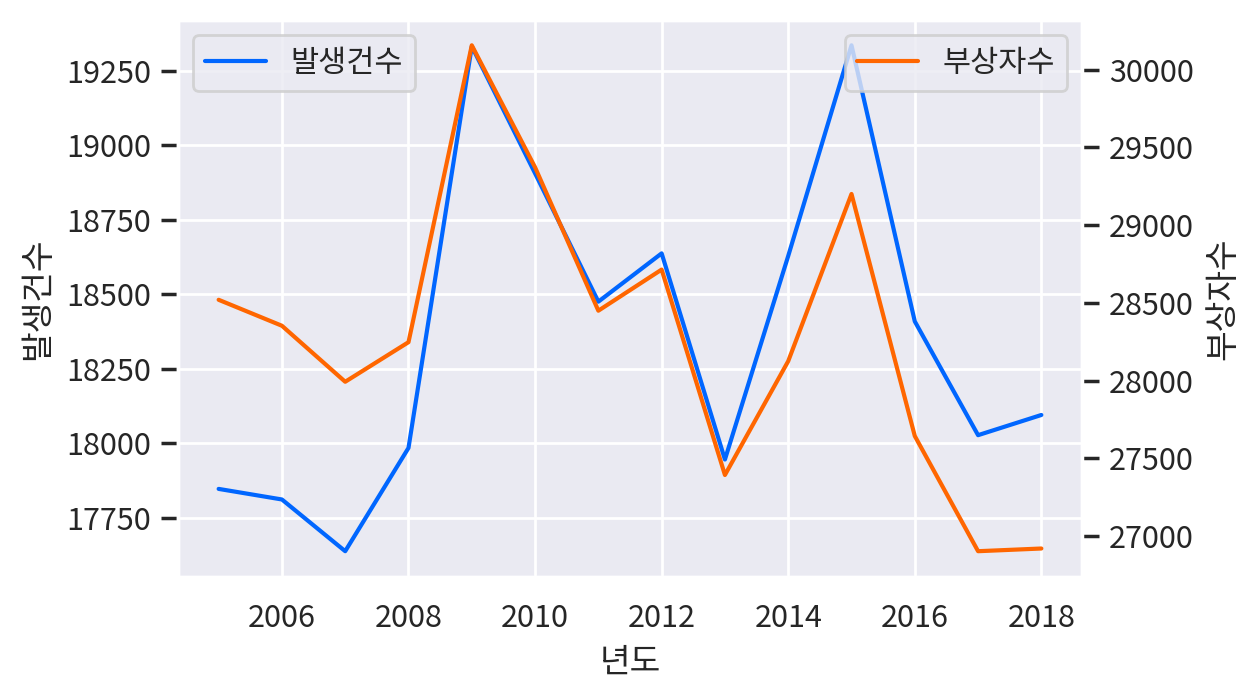

In [14]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

ax2=ax.twinx()

# 2) 그래프 그리기 -> seaborn 사용
# sb.boxplot(data=df1, orient='h')
sb.lineplot(data=df, x=df.index, y='발생건수', color='#0066ff', ax=ax, label='발생건수')
sb.lineplot(data=df, x=df.index, y='부상자수', color='#ff6600', ax=ax2, label='부상자수')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료